In [1]:
import pandas as pd
from glob import glob
import os.path
from matplotlib import pyplot

In [2]:
def load_acc_info(acc, *, src='swine'):
    d = {}
    d['acc'] = acc
    d['source'] = src

    all_gather = pd.read_csv(f'outputs.{src}-x-all/{acc}.gather.csv')
    all_gathertax = pd.read_csv(f'outputs.{src}-x-all/{acc}.gathertax.summarized.csv')
    all_gathertax_species = all_gathertax[all_gathertax['rank'] == 'species']
    d['all_num_genomes'] = len(all_gather)
    d['all_num_species'] = len(all_gathertax_species)

    try:
        reps_gather = pd.read_csv(f'outputs.{src}-x-reps/{acc}.gather.csv')
        reps_gathertax = pd.read_csv(f'outputs.{src}-x-reps/{acc}.gathertax.summarized.csv')
        reps_gathertax_species = reps_gathertax[reps_gathertax['rank'] == 'species']
        d['reps_num_genomes'] = len(reps_gather)
        d['reps_num_species'] = len(reps_gathertax_species)
    except:
        d['reps_num_genomes'] = -1
        d['reps_num_species'] = -1

    weighted_found = int(all_gather['sum_weighted_found'].tail(1))
    weighted_total = int(all_gather['total_weighted_hashes'].tail(1))
    d['p_weighted_found'] = 100*weighted_found / weighted_total
    
    try:
        host_df = pd.read_csv(f'outputs.{src}-x-all/{acc}.x.host.search.csv')
        p_host = float(host_df['similarity'].tail(1)) * 100
    except pd.errors.EmptyDataError:
        p_host = 0
    d['p_host'] = p_host
    
    return d

In [3]:
acclist = glob('outputs.human-x-all/*.gather.csv')
acclist = [ os.path.basename(x) for x in acclist ]
acclist = [ x.split('.')[0] for x in acclist ]

print(len(acclist))

218


In [4]:
acc_info_list = [ load_acc_info(acc, src='human') for acc in acclist ]

gather_info_df = pd.DataFrame(acc_info_list)

In [5]:
gather_info_df

,acc,source,all_num_genomes,all_num_species,reps_num_genomes,reps_num_species,p_weighted_found,p_host
0,ERR4777899,human,31,25,25,26,85.846811,0.0
1,SRR7688469,human,15,15,13,14,41.931097,0.0
2,SRR13167563,human,3,3,2,3,81.133333,0.0
3,SRR1647363,human,66,48,50,51,62.685161,0.0
4,SRR13022313,human,262,188,216,217,82.999113,0.0
...,...,...,...,...,...,...,...,...
213,SRR21968712,human,88,80,81,82,92.826622,0.0
214,ERR7746094,human,1731,1038,1181,1182,80.726532,0.0
215,SRR058014,human,1,2,-1,-1,0.317776,0.0
216,ERR10797194,human,18,18,17,18,95.726861,0.0


{'bodies': [<matplotlib.collections.PolyCollection at 0x147cad910>],
 'cmaxes': <matplotlib.collections.LineCollection at 0x147c92790>,
 'cmins': <matplotlib.collections.LineCollection at 0x147cadfa0>,
 'cbars': <matplotlib.collections.LineCollection at 0x147c383a0>}

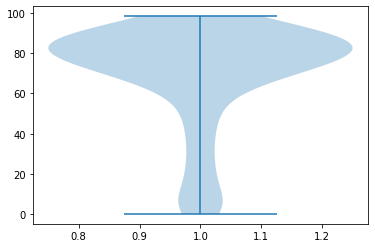

In [6]:
pyplot.violinplot(gather_info_df['p_weighted_found'])

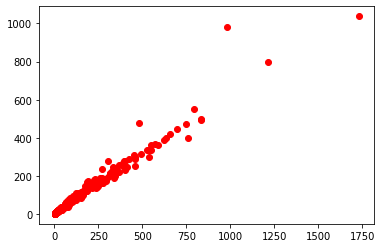

In [7]:
pyplot.plot(gather_info_df['all_num_genomes'], gather_info_df['all_num_species'], 'ro')

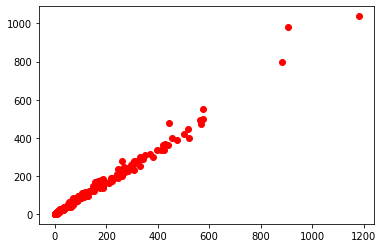

In [8]:
pyplot.plot(gather_info_df['reps_num_species'], gather_info_df['all_num_species'], 'ro')

{'bodies': [<matplotlib.collections.PolyCollection at 0x147e9c340>],
 'cmaxes': <matplotlib.collections.LineCollection at 0x147e9c1f0>,
 'cmins': <matplotlib.collections.LineCollection at 0x147e9c820>,
 'cbars': <matplotlib.collections.LineCollection at 0x147e9cbe0>}

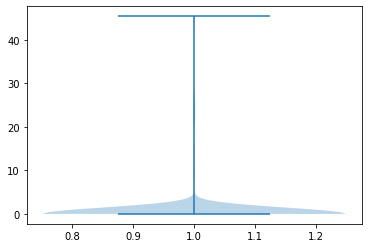

In [9]:
pyplot.violinplot(gather_info_df['p_host'])

In [10]:
gather_info_df.sort_values(by='p_host')

,acc,source,all_num_genomes,all_num_species,reps_num_genomes,reps_num_species,p_weighted_found,p_host
0,ERR4777899,human,31,25,25,26,85.846811,0.000000
137,DRR171637,human,298,192,230,231,89.520104,0.000000
138,SRR21171012,human,7,6,8,9,93.563155,0.000000
139,SRR12826817,human,1,2,1,2,5.052265,0.000000
140,SRR514233,human,415,246,298,299,77.689022,0.000000
...,...,...,...,...,...,...,...,...
76,ERR4421616,human,4,4,3,4,52.932622,14.502757
51,SRR15463845,human,149,86,102,103,68.471814,21.077398
175,SRR18147653,human,133,110,112,113,63.860007,23.681985
32,SRR16316542,human,306,277,259,260,69.616796,26.240226


In [11]:
len(gather_info_df[gather_info_df['p_weighted_found'] < 50])

36

In [12]:
36 / 218 * 8000

1321.1009174311928

In [14]:
gather_info_df['p_weighted_found'].describe()

count    218.000000
mean      70.112420
std       25.350907
min        0.181514
25%       66.981101
50%       78.563161
75%       86.724190
max       98.377011
Name: p_weighted_found, dtype: float64

In [15]:
247 - 218

29